In [662]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [663]:
dataset=pd.read_csv("Heart_Disease.csv")

In [664]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
687,44,1,2,150,288,0,0,150,1,3.0,2,1
688,53,1,3,145,518,0,0,130,0,0.0,2,1
689,56,1,3,130,167,0,0,114,0,0.0,1,0
690,54,1,4,125,224,0,0,122,0,2.0,2,1


In [665]:
info = ["age","1: male, 0: female","cp", "1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","trestbps"," serum chol in mg/dl","fbs > 120 mg/dl","restecg results (values 0,1,2)"," thalach achieved","exang","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
print(info)

['age', '1: male, 0: female', 'cp', '1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic', 'trestbps', ' serum chol in mg/dl', 'fbs > 120 mg/dl', 'restecg results (values 0,1,2)', ' thalach achieved', 'exang', 'oldpeak = ST depression induced by exercise relative to rest', 'the slope of the peak exercise ST segment', 'number of major vessels (0-3) colored by flourosopy', 'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect']


In [666]:
dataset.shape

(692, 12)

In [667]:
dataset.count()

age         692
sex         692
cp          692
trestbps    692
chol        692
fbs         692
restecg     692
thalach     692
exang       692
oldpeak     692
slope       692
target      692
dtype: int64

In [668]:
X=dataset.drop("target",axis=1)

In [669]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
687,44,1,2,150,288,0,0,150,1,3.0,2
688,53,1,3,145,518,0,0,130,0,0.0,2
689,56,1,3,130,167,0,0,114,0,0.0,1
690,54,1,4,125,224,0,0,122,0,2.0,2


In [670]:
y=dataset["target"]

In [671]:
y

0      0
1      1
2      0
3      1
4      0
      ..
687    1
688    1
689    0
690    1
691    1
Name: target, Length: 692, dtype: int64

In [672]:
target_temp=dataset.target.value_counts()
print(target_temp)

1    441
0    251
Name: target, dtype: int64


In [673]:
dataset.corr()  # Pairwise correlation of all columns in the dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
age,1.000000,0.136631,0.194415,0.259636,-0.330148,0.211152,0.258784,-0.447411,0.202554,0.204744,0.258503,0.299794
sex,0.136631,1.000000,0.246381,0.000336,-0.200875,0.140685,0.068119,-0.195754,0.159208,0.090598,0.185088,0.288866
cp,0.194415,0.246381,1.000000,-0.007063,-0.298642,0.241035,-0.007228,-0.318390,0.415749,0.235916,0.380639,0.532307
trestbps,0.259636,0.000336,-0.007063,1.000000,0.133685,-0.125896,0.143951,-0.141179,0.174848,0.137936,-0.042659,0.022914
chol,-0.330148,-0.200875,-0.298642,0.133685,1.000000,-0.387514,-0.136596,0.247699,-0.090644,-0.003343,-0.212862,-0.423663
fbs,0.211152,0.140685,0.241035,-0.125896,-0.387514,1.000000,0.052915,-0.084187,-0.007048,0.105683,0.186231,0.400263
restecg,0.258784,0.068119,-0.007228,0.143951,-0.136596,0.052915,1.000000,-0.077942,0.048950,0.025895,0.022279,0.075308
thalach,-0.447411,-0.195754,-0.318390,-0.141179,0.247699,-0.084187,-0.077942,1.000000,-0.354290,-0.082847,-0.326351,-0.354041
exang,0.202554,0.159208,0.415749,0.174848,-0.090644,-0.007048,0.048950,-0.354290,1.000000,0.416015,0.449194,0.442920
oldpeak,0.204744,0.090598,0.235916,0.137936,-0.003343,0.105683,0.025895,-0.082847,0.416015,1.000000,0.295390,0.347469


In [674]:
dataset.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     40    1   2       140   289    0        0      172      0      0.0   
1     49    0   3       160   180    0        0      156      0      1.0   
2     37    1   2       130   283    0        1       98      0      0.0   
3     48    0   4       138   214    0        0      108      1      1.5   
4     54    1   3       150   195    0        0      122      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
687   44    1   2       150   288    0        0      150      1      3.0   
688   53    1   3       145   518    0        0      130      0      0.0   
689   56    1   3       130   167    0        0      114      0      0.0   
690   54    1   4       125   224    0        0      122      0      2.0   
691   41    1   4       130   172    0        1      130      0      2.0   

     slope  target  
0        1       0  
1        2 

In [675]:
dataset.count()

age         692
sex         692
cp          692
trestbps    692
chol        692
fbs         692
restecg     692
thalach     692
exang       692
oldpeak     692
slope       692
target      692
dtype: int64

In [676]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

In [677]:
dataset.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
687,False,False,False,False,False,False,False,False,False,False,False,False
688,False,False,False,False,False,False,False,False,False,False,False,False
689,False,False,False,False,False,False,False,False,False,False,False,False
690,False,False,False,False,False,False,False,False,False,False,False,False


In [678]:
import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

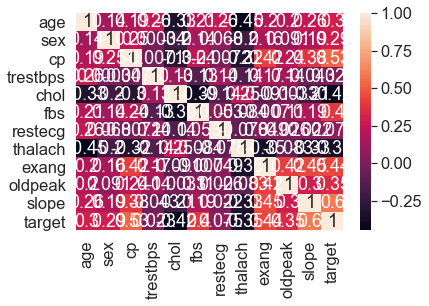

In [679]:
######################################################Heatmap#################################################################
sns.heatmap(dataset.corr(),annot=True)   
plt.show()

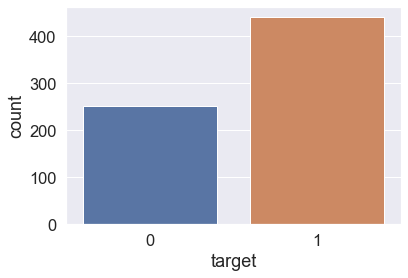

In [680]:
sns.countplot(y)

In [681]:
dataset["age"].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75],
      dtype=int64)

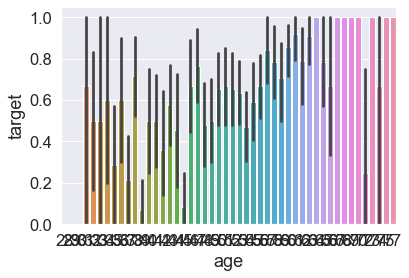

In [682]:
sns.barplot(dataset["age"],y)

In [683]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

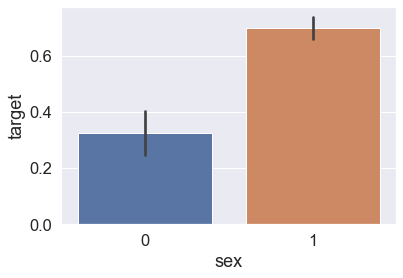

In [684]:
sns.barplot(dataset["sex"],y)

In [685]:
dataset["cp"].unique()

array([2, 3, 4, 1], dtype=int64)

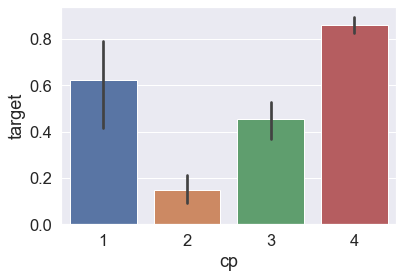

In [686]:
sns.barplot(dataset["cp"],y)

In [687]:
dataset["trestbps"].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122, 133,  95, 105,  80, 137, 185, 165, 126, 152, 116,
         0, 144, 154, 134, 104, 139, 131, 141, 178, 146], dtype=int64)

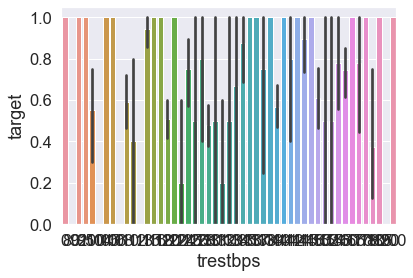

In [688]:
sns.barplot(dataset["trestbps"],y)

In [689]:
dataset["chol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 220, 347, 344, 358, 169, 181,
         0, 236, 203, 153, 316, 311, 252, 458, 384], dtype=int64)

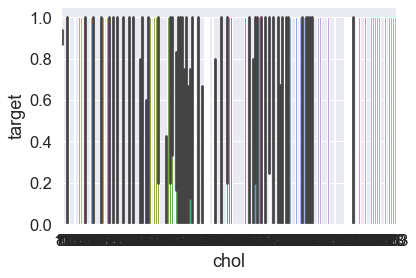

In [690]:
sns.barplot(dataset["chol"],y)

In [691]:
dataset["fbs"].unique()

array([0, 1], dtype=int64)

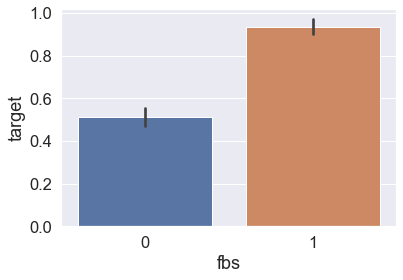

In [692]:
sns.barplot(dataset["fbs"],y)

In [693]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

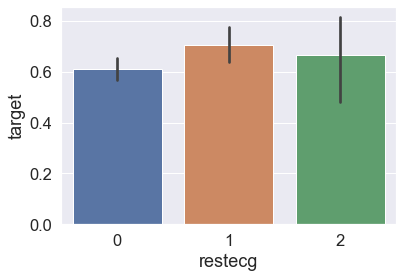

In [694]:
sns.barplot(dataset["restecg"],y)

In [695]:
dataset["thalach"].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103, 126,  93, 131, 149, 123, 182, 141,  77, 109,
       133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,  60,
        70, 163,  67,  78,  84, 111,  80, 107, 161,  69], dtype=int64)

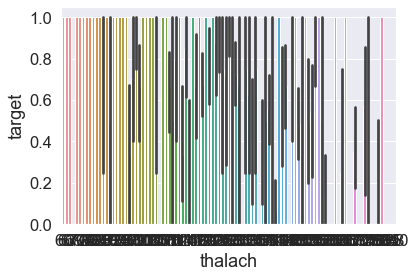

In [696]:
sns.barplot(dataset["thalach"],y)

In [697]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

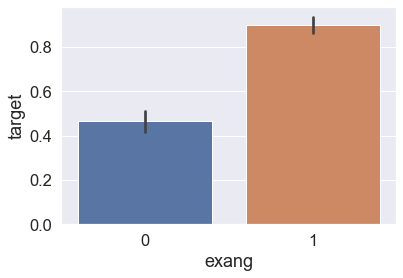

In [698]:
sns.barplot(dataset["exang"],y)

In [699]:
dataset["oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9])

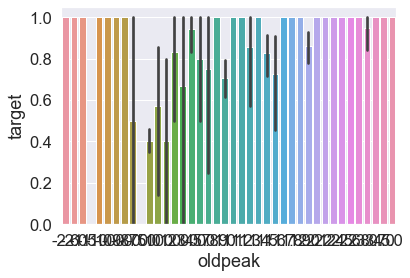

In [700]:
sns.barplot(dataset["oldpeak"],y)

In [701]:
dataset["slope"].unique()

array([1, 2, 3], dtype=int64)

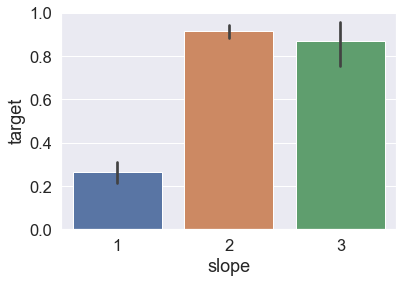

In [702]:
sns.barplot(dataset["slope"],y)

In [703]:
dataset["target"].unique()

array([0, 1], dtype=int64)

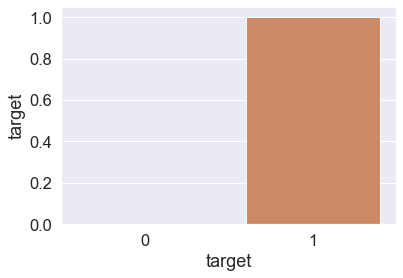

In [704]:
sns.barplot(dataset["target"],y)

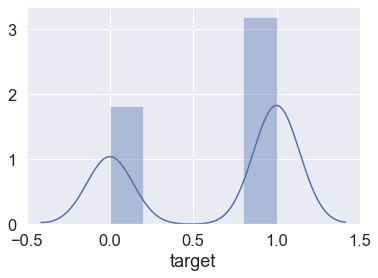

In [705]:
sns.distplot(dataset["target"])

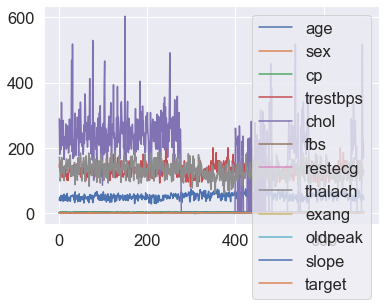

In [706]:
dataset.plot()

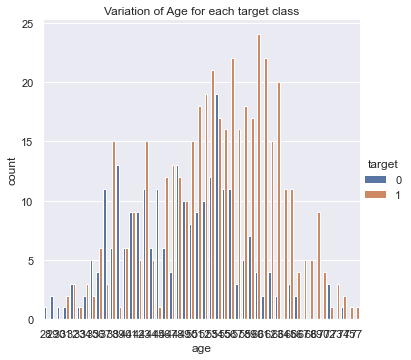

In [707]:
#######################################Variation of Age for each target class###################################################
sns.set(font_scale =1) 
sns.catplot(kind = 'count', data = dataset, x = 'age', hue = 'target')
plt.title('Variation of Age for each target class')
plt.show()

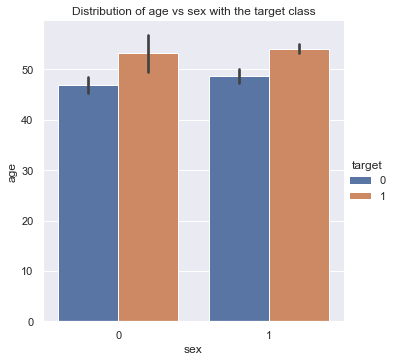

In [708]:
##############################################Distribution of age vs sex with the target class##################################
sns.catplot(kind = 'bar', data = dataset, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [709]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       692 non-null    int64  
 1   sex       692 non-null    int64  
 2   cp        692 non-null    int64  
 3   trestbps  692 non-null    int64  
 4   chol      692 non-null    int64  
 5   fbs       692 non-null    int64  
 6   restecg   692 non-null    int64  
 7   thalach   692 non-null    int64  
 8   exang     692 non-null    int64  
 9   oldpeak   692 non-null    float64
 10  slope     692 non-null    int64  
 11  target    692 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 65.0 KB


In [710]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [711]:
##################################################Data Preprocessing############################################################
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.20) #train=80 test=20

In [712]:
X_train.shape

(553, 11)

In [713]:
X_test.shape

(139, 11)

In [714]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [715]:
X=dataset.drop("target",axis=1)
y=dataset["target"]

In [716]:
##################################################Logistic Regression###########################################################
from sklearn.linear_model import LogisticRegression
logrc=LogisticRegression(random_state=0)
logrc.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [717]:
y_pred=logrc.predict(X_test)

In [718]:
data=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [719]:
data

,Actual,Predicted
455,1,1
144,1,0
601,1,1
579,1,1
358,1,1
...,...,...
45,0,1
344,1,1
62,0,0
439,0,1


<BarContainer object of 139 artists>

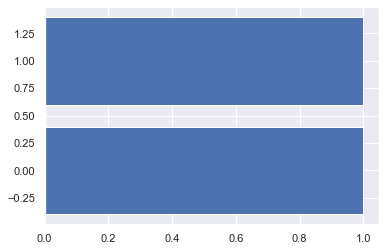

In [720]:
plt.barh(y_test,y_pred)

In [721]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

[[40 10]
 [ 4 85]]
89.92805755395683
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        50
           1       0.89      0.96      0.92        89

    accuracy                           0.90       139
   macro avg       0.90      0.88      0.89       139
weighted avg       0.90      0.90      0.90       139



In [722]:
#####################################################Naive Bayes################################################################
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [723]:
y_pred=classifier.predict(X_test)

In [724]:
data=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [725]:
data

,Actual,Predicted
455,1,1
144,1,0
601,1,1
579,1,1
358,1,1
...,...,...
45,0,1
344,1,1
62,0,0
439,0,1


In [726]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

[[41  9]
 [10 79]]
86.33093525179856
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        50
           1       0.90      0.89      0.89        89

    accuracy                           0.86       139
   macro avg       0.85      0.85      0.85       139
weighted avg       0.86      0.86      0.86       139



In [727]:
#######################################################Suppport Vector Machine(SVM)#############################################
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [728]:
y_pred=classifier.predict(X_test)

In [729]:
data=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [730]:
data

,Actual,Predicted
455,1,1
144,1,0
601,1,1
579,1,1
358,1,1
...,...,...
45,0,1
344,1,1
62,0,0
439,0,1


In [731]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

[[41  9]
 [ 1 88]]
92.80575539568345
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.91      0.99      0.95        89

    accuracy                           0.93       139
   macro avg       0.94      0.90      0.92       139
weighted avg       0.93      0.93      0.93       139



In [732]:
#####################################################Decision Tree Classifier###################################################
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [733]:
y_pred=classifier.predict(X_test)

In [734]:
data=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [735]:
data

,Actual,Predicted
455,1,1
144,1,0
601,1,1
579,1,1
358,1,1
...,...,...
45,0,0
344,1,1
62,0,0
439,0,1


In [736]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

[[47  3]
 [ 6 83]]
93.5251798561151
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        50
           1       0.97      0.93      0.95        89

    accuracy                           0.94       139
   macro avg       0.93      0.94      0.93       139
weighted avg       0.94      0.94      0.94       139



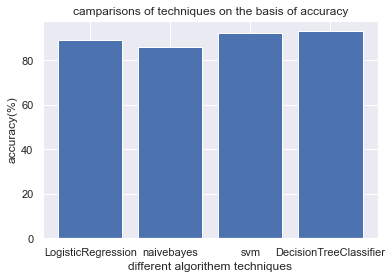

In [741]:
x=["LogisticRegression","naivebayes","svm","DecisionTreeClassifier"]
y=[89,86,92,93]

import matplotlib.pyplot as plt
plt.bar(x,y)
plt.xlabel("different algorithem techniques")
plt.ylabel("accuracy(%)")
plt.title("camparisons of techniques on the basis of accuracy")
plt.show()

In [ ]:
#As per graph Decision Tree Classifier is doing better performance

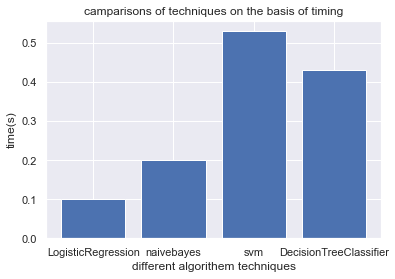

In [742]:
a=["LogisticRegression","naivebayes","svm","DecisionTreeClassifier"]
b=[0.10,0.20,0.53,0.43]

plt.bar(a,b)
plt.xlabel("different algorithem techniques")
plt.ylabel("time(s)")
plt.title("camparisons of techniques on the basis of timing")
plt.show()

In [739]:
#We see that the accuracy for the test set is achieved by Logistic Regression is 89.92% and Naive Bayes is 86.33%.
#The lowest accuracy for the test set is achieved by Naive Bayes is 86.33%
#The highest accuracy for the test set is achieved by Decision Tree Classifier i.e. 93.52%.
#So Decision Tree Classifier algorithm is having highest accuracy for the test set which is best as compared to Logistic Regression,Naive Bayes and SVM algorithm which we have used.

In [757]:
import tkinter
from tkinter import * 
from tkinter import messagebox 
import numpy as np
root=Tk()
root.title("heart Desease Prediction System")
root.geometry("1000x800")
root.resizable(0,0)
window_width=800
window_height=800
screen_width=root.winfo_screenwidth()

screen_height=root.winfo_screenheight()
x_cordinate=int((screen_width/2-window_width/2))
y_cordinate=int((screen_height/2-window_height/2))
root.geometry("{}x{}+{}+{}".format(window_width,window_height,x_cordinate,y_cordinate))

def check():
    global classifier,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
    new=np.array([[age.get(),
                   sex.get(),
                   cp.get(),
                   trestbps.get(),
                   chol.get(),
                   fbs.get(),
                   restecg.get(),
                   thalach.get(),
                   exang.get(),
                   oldpeak.get(),
                   slope.get()]])
    print(new)
    y_pred=classifier.predict(new)
    if y_pred==1:
        tkinter.messagebox.showinfo('result',"Heart Disease Present")
    else:
        tkinter.messagebox.showinfo('result',"Heart Disease Not Present")
age = IntVar()
sex=IntVar()
cp=IntVar()
trestbps=IntVar()
chol=IntVar()
fbs=IntVar()
restecg=IntVar()
thalach=IntVar()
exang=IntVar()
oldpeak=IntVar()
slope=IntVar()

      
Label(root,text="Heart Disease Prediction System",font=('arial',25,"bold")).place(x=210,y=30)
Label(root,text="Enter Age",font=('arial',16)).place(x=45,y=100)
Entry(root,textvariable=age,font=('arial',16)).place(x=350,y=100)
Label(root,text="Enter Sex",font=('arial',16)).place(x=45,y=150)
Entry(root,textvariable=sex,font=('arial',16)).place(x=350,y=150)
Label(root,text="Enter Chest Pain Type ", font=('arial',16)).place(x=45,y=200)                             
Entry(root,textvariable=cp,font=('arial',16)).place(x=350,y=200)
Label(root,text="Enter Resting Blood Pressure",font=('arial',16)).place(x=45,y=250)
Entry(root,textvariable=trestbps,font=('arial',16)).place(x=350,y=250)
Label(root,text="Enter Serum Cholestoral ",font=('arial',16)).place(x=45,y=300)
Entry(root,textvariable=chol,font=('arial',16)).place(x=350,y=300)
Label(root,text="Fasting Blood Sugar ",font=('arial',16)).place(x=45,y=350)
Entry(root,textvariable=fbs,font=('arial',16)).place(x=350,y=350)
Label(root,text="Enter Resting Electrocardiographic ",font=('arial',16)).place(x=45,y=400)
Entry(root,textvariable=restecg,font=('arial',16)).place(x=350,y=400)
Label(root,text="Enter Maximum Heart Rate ",font=('arial',16)).place(x=45,y=450)
Entry(root,textvariable=thalach,font=('arial',16)).place(x=350,y=450)
Label(root,text="Enter Exercise Induced Angina  ",font=('arial',16)).place(x=45,y=500)
Entry(root,textvariable=exang,font=('arial',16)).place(x=350,y=500)
Label(root,text="Enter ST Depression  ",font=('arial',16)).place(x=45,y=550)
Entry(root,textvariable=oldpeak,font=('arial',16)).place(x=350,y=550)
Label(root,text="Enter The Slope Of The Peak ",font=('arial',16)).place(x=45,y=600)
Entry(root,textvariable=slope,font=('arial',16)).place(x=350,y=600)
Button(root,text="---CHECK---",font=('arial',16,"bold"),command=check).place(x=350,y=750)

root.mainloop()

[[ 50   1   1 130 270 140   0 180   0   1   0]]
[[ 50   1   1 130 270 140   0 180   0   0   0]]
[[ 50   0   1 150 280 160   1 190   0   1   1]]
